In [70]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import re
import folium
from folium import plugins
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [71]:
files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test_results.csv", "sat_results.csv"]

data = {}
for f in files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

In [72]:
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())


ap_2010

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  

class_size

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Rober

In [73]:
ap_2010 = data['ap_2010']
ap_2010.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


In [74]:
class_size = data['class_size']
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [75]:
from numpy.lib.function_base import append

In [76]:
#Добавляет ведущих нулей столько, чтобы длина строк в class_size['CSD'] была 2
class_size['CSD'] = class_size['CSD'].apply('{:0>2}'.format)

In [77]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,01,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,01,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,01,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,01,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [78]:
class_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   27611 non-null  object 
 1   BOROUGH                               27611 non-null  object 
 2   SCHOOL CODE                           27611 non-null  object 
 3   SCHOOL NAME                           27611 non-null  object 
 4   GRADE                                 26127 non-null  object 
 5   PROGRAM TYPE                          26127 non-null  object 
 6   CORE SUBJECT (MS CORE and 9-12 ONLY)  26127 non-null  object 
 7   CORE COURSE (MS CORE and 9-12 ONLY)   26127 non-null  object 
 8   SERVICE CATEGORY(K-9* ONLY)           26127 non-null  object 
 9   NUMBER OF STUDENTS / SEATS FILLED     26127 non-null  float64
 10  NUMBER OF SECTIONS                    26127 non-null  float64
 11  AVERAGE CLASS S

In [79]:
# Соединяю столбы CSD, school_code, которые в сумме равны DBN и соответственно переименую
class_size['DBN'] = class_size['CSD'] + class_size['SCHOOL CODE'] 

In [80]:
class_size = class_size[class_size["GRADE "] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
class_size = class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace = True)
data["class_size"] = class_size
class_size.head()

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [81]:
demogr = data['demographics']
demogr.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [82]:
demogr = demogr[demogr['schoolyear'] == 20112012]
data["demographics"] = demogr
demogr.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


In [83]:
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"] == 2011]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == 3]
math_test_res = data["math_test_results"]

math_test_res.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %


In [84]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
grad = data['graduation']
grad.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


In [85]:
hs_direct = data['hs_directory']
hs_direct.rename(columns={'dbn':'DBN'}, inplace=True)
hs_direct.head()

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...


In [86]:
hs_direct.head(
)

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...


In [87]:

def lat(hs_direct_):
  hs_direct_=re.findall(r'\(.+\)', hs_direct_)
  hs_direct_ = [x.replace('(', '') for x in hs_direct_]
  for line in hs_direct_:
    Type = line.split(",")
    lati = Type[0]
    

 
  return lati

In [88]:
def lon(hs_direct_):
  hs_direct_=re.findall(r'\(.+\)', hs_direct_)
  hs_direct_ = [x.replace(')', '') for x in hs_direct_]
  for line in hs_direct_:
    Type = line.split(",")
    lon = Type[1]

 
  return lon

In [89]:
hs_direct['lat'] = hs_direct['Location 1'].apply(lat)
hs_direct['lon'] = hs_direct['Location 1'].apply(lon)

In [90]:
hs_direct['lat'] = pd.to_numeric(hs_direct['lat'], errors = 'coerce')
hs_direct['lon'] = pd.to_numeric(hs_direct['lon'] , errors = 'coerce')

In [91]:
hs_direct= hs_direct.loc[:, ["DBN", "school_name", "borough", "grade_span_min", "grade_span_max", "city", "total_students", "school_type", "program_highlights", "language_classes", "Location 1", "lat", "lon"]]

In [92]:
sat_results = data['sat_results']
sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [93]:
sat_results['SAT Critical Reading Avg. Score'] =  pd.to_numeric(sat_results['SAT Critical Reading Avg. Score'], errors = 'coerce')
sat_results['SAT Math Avg. Score'] = pd.to_numeric(sat_results['SAT Math Avg. Score'], errors = 'coerce')
sat_results['SAT Writing Avg. Score'] = pd.to_numeric(sat_results['SAT Writing Avg. Score'], errors = 'coerce')

In [94]:
sat_results['sat_score'] = sat_results['SAT Critical Reading Avg. Score'] + sat_results['SAT Math Avg. Score'] +  sat_results['SAT Writing Avg. Score']

In [95]:
sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [96]:
s_all = pd.read_csv('survey_all.txt',delimiter="\t", encoding="windows-1252")
s_75d = pd.read_csv('survey_d75.txt',delimiter="\t", encoding="windows-1252")

In [97]:
s_all_75 = pd.concat([s_all, s_75d], axis = 0)
s_all_75 = s_all_75.rename(columns={'dbn': 'DBN'})
s_all_75.head()

,DBN,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
s_all_75.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 55
Columns: 2773 entries, DBN to s_q14_11
dtypes: float64(2762), int64(6), object(5)
memory usage: 36.0+ MB


In [99]:
s_fin = s_all_75.loc[:, ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]]
s_fin.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


In [100]:
# inner 
all = sat_results.merge(ap_2010, on = 'DBN', how = 'inner')
all = all.merge(grad, on = 'DBN', how = 'inner')
all = all.merge(demogr, on = 'DBN', how = 'inner')
all = all.merge(hs_direct, on = 'DBN', how = 'inner')
# outer
all = all.merge(math_test_res ,on = 'DBN', how = 'outer')
# left
all = all.merge(s_fin, on = 'DBN', how = 'left')

In [101]:
all = all.drop_duplicates(subset=['DBN'])

In [102]:
all.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,6.6,7.3,6.0,5.7,6.3,7.0,6.8,6.3,6.7,7.2
1,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,8.0,8.8,NaN,NaN,NaN,NaN,7.9,7.9,7.9,8.4
2,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,5.9,7.3,7.3,6.4,7.0,7.7,7.8,6.7,6.9,7.8
3,02M296,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,58,374.0,375.0,362.0,1111.0,High School of Hospitality Management,NaN,NaN,...,8.7,8.9,7.1,6.5,7.0,7.4,7.9,7.3,7.6,8.0
4,02M298,PACE HIGH SCHOOL,85,423.0,438.0,432.0,1293.0,Pace High School,21.0,21.0,...,6.8,7.1,6.6,6.2,6.7,7.5,6.9,6.6,6.8,7.4


In [117]:
all.shape

(222, 120)

In [104]:
all['school_dist'] = all['DBN']. apply(lambda x : x[:2])

In [105]:
#К числам
all['AP Test Takers '] =  pd.to_numeric(all['AP Test Takers '], errors = 'coerce')
all['Total Exams Taken'] = pd.to_numeric(all['Total Exams Taken'], errors = 'coerce')
all['Number of Exams with scores 3 4 or 5'] = pd.to_numeric(all['Number of Exams with scores 3 4 or 5'], errors = 'coerce')

In [106]:
#Пропуски на средние
all['AP Test Takers '] = all['AP Test Takers '].fillna(all['AP Test Takers '].mean())
all['Total Exams Taken'] = all['Total Exams Taken'].fillna(all['Total Exams Taken'].mean())
all['Number of Exams with scores 3 4 or 5'] = all['Number of Exams with scores 3 4 or 5'].fillna(all['Number of Exams with scores 3 4 or 5'].mean())

In [107]:
all.corr()['sat_score']

SAT Critical Reading Avg. Score    0.987586
SAT Math Avg. Score                0.975039
SAT Writing Avg. Score             0.989485
sat_score                          1.000000
AP Test Takers                     0.606080
                                     ...   
aca_s_11                           0.350106
saf_tot_11                         0.368741
com_tot_11                         0.080360
eng_tot_11                         0.133142
aca_tot_11                         0.211530
Name: sat_score, Length: 75, dtype: float64

In [108]:
#Прямая сильная кор - Total Regents - % of cohort, Advanced Regents - % of cohort, Advanced Regents - % of grads,Regents w/o Advanced - % of cohort  

In [109]:
map = folium.Map(location = [all['lat'].mean(), all['lon'].mean()], zoom_start=10)
marker_cluster = folium.plugins.MarkerCluster().add_to(map)

for name, row in all.iterrows():
    folium.Marker([row["lat"], row["lon"]], popup="{0}: {1}".format(row["DBN"], row["school_name"])).add_to(marker_cluster)

In [110]:
import folium
from folium import plugins

map = folium.Map(location=[all['lat'].mean(), all['lon'].mean()], zoom_start=10)
marker_cluster = folium.plugins.MarkerCluster().add_to(map)
for name, row in all.iterrows():
    folium.Marker([row["lat"], row["lon"]], popup="{0}: {1}".format(row["DBN"], row["school_name"])).add_to(marker_cluster)
map.save('schools.html')
map

In [111]:
heatmap = folium.Map(location = [all['lat'].mean(), all['lon'].mean()], zoom_start = 10)
heatmap.add_children(plugins.HeatMap([[row["lat"], row["lon"]] for name,row in all.iterrows()])) 
heatmap.save('heatmap.html')
heatmap

<ipython-input-111-b1cc188daf30>:2: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  heatmap.add_children(plugins.HeatMap([[row["lat"], row["lon"]] for name,row in all.iterrows()]))


<AxesSubplot:>

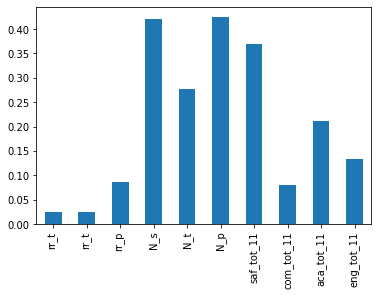

In [112]:
#Корреляция результатов SAT с опросами
all.corr()['sat_score'][['rr_t', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_tot_11', 'com_tot_11', 'aca_tot_11', 'eng_tot_11']].plot.bar()

<AxesSubplot:>

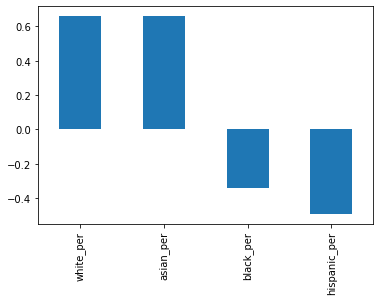

In [113]:
# Успеваемость учеников разной расы
all.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()

<AxesSubplot:xlabel='female_per', ylabel='sat_score'>

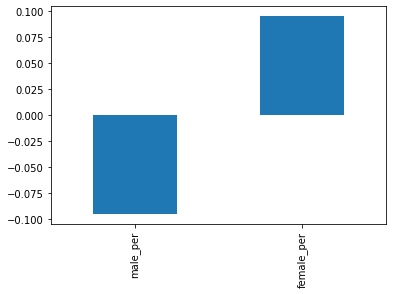

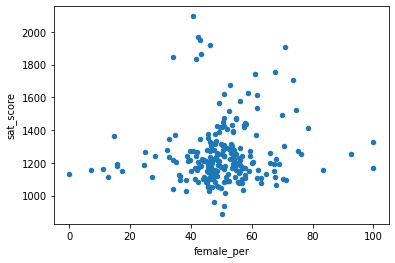

In [114]:
#Половые различия
all.corr()["sat_score"][["male_per", "female_per"]].plot.bar()
all.plot.scatter(x='female_per', y='sat_score')

In [115]:
#Лучшие школы исходя из скаттера
all[(all["female_per"] > 65) & (all["sat_score"] > 1400)]["School Name"]

10            PROFESSIONAL PERFORMING ARTS HIGH SCH
15                    ELEANOR ROOSEVELT HIGH SCHOOL
23                     TALENT UNLIMITED HIGH SCHOOL
36             FIORELLO H. LAGUARDIA HIGH SCHOOL OF
182                     TOWNSEND HARRIS HIGH SCHOOL
207    FRANK SINATRA SCHOOL OF THE ARTS HIGH SCHOOL
Name: School Name, dtype: object